### 1. Context

Predict whether or not it will rain tomorrow by training a binary classification model on target RainTomorrow
Content

This dataset contains daily weather observations from numerous Australian weather stations.

The target variable RainTomorrow means: Did it rain the next day? Yes or No.

**Note: You should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the answers to your model and reduce its predictability. Read more about it here.
Source & Acknowledgements!**

Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data. Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml

This dataset is also available via the R package rattle.data and at https://rattle.togaware.com/weatherAUS.csv.
Package home page: http://rattle.togaware.com. Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

And to see some nice examples of how to use this data: https://togaware.com/onepager/


**Attribute Information**

In [2]:
from IPython.display import IFrame
IFrame("http://www.bom.gov.au/climate/dwo/IDCJDW0000.pdf", width=900, height=900)

### 2. Preparation

In [3]:
# import necessary packages here
import pandas as pd
import numpy as np

# Common Model Algorithms
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

# Common Model Helpers
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, matthews_corrcoef, make_scorer
from sklearn.impute import SimpleImputer

# Dimensionality Reduction
from sklearn.decomposition import PCA, TruncatedSVD

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# yellowbrick
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.features import ParallelCoordinates

# Configure Visualization Defaults
# %matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('whitegrid')

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\kovus\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\kovus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
from aussierain.data import get_weather_data
from aussierain.scoring import score_this

### 3. Gather Data

In [5]:
# import data using a custom function
data = get_weather_data()

# make a copy of retrieved data
df = data.copy()

# take a look at first 5 rows
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### 5. Check Data

In [6]:
# import pandas_profiling
# pandas_profiling.ProfileReport(df)

In [7]:
# preview information on features
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142193 entries, 2008-12-01 to 2017-06-24
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm     

In [8]:
# statistical information on features
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [9]:
# Are there any missing values?
print('There is(are) {} total missing values in dataset'.format(df.isnull().sum().sum()))

# Are there any duplicated samples?
print('There is(are) {} duplicated rows in dataset'.format(df.duplicated().sum()))

There is(are) 316559 total missing values in dataset
There is(are) 45 duplicated rows in dataset


Missing values I will leave as it is and visualize the dataset. Additionally not going to drop duplicated values, since it is fairly possible that same weather conditions occured by chance.

### 6. Explore Data

#### 6.1 Imbalanced Classes

In [10]:
# how many unique values our features have?
pd.DataFrame({'Feature':df.nunique().index, 'Unique values':df.nunique(dropna=False).values})

,Feature,Unique values
0,Location,49
1,MinTemp,390
2,MaxTemp,506
3,Rainfall,680
4,Evaporation,357
5,Sunshine,146
6,WindGustDir,17
7,WindGustSpeed,68
8,WindDir9am,17
9,WindDir3pm,17


In [11]:
# separate categorical features(discrete)
cat_cols = df.columns[(df.nunique()<=5) | (df.dtypes=='object')]

# separate ordinal columns(continuous)
con_cols = df.columns[~df.columns.isin(cat_cols)]

print(f'Categorical features: {cat_cols.tolist()}\nOrdinal features: {con_cols.tolist()}')

Categorical features: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Ordinal features: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


#### 6.2 Categorical variables

In [12]:
df[cat_cols].describe(include='all')

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,132863,132180,138415,140787,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3418,9780,11393,10663,109332,110316


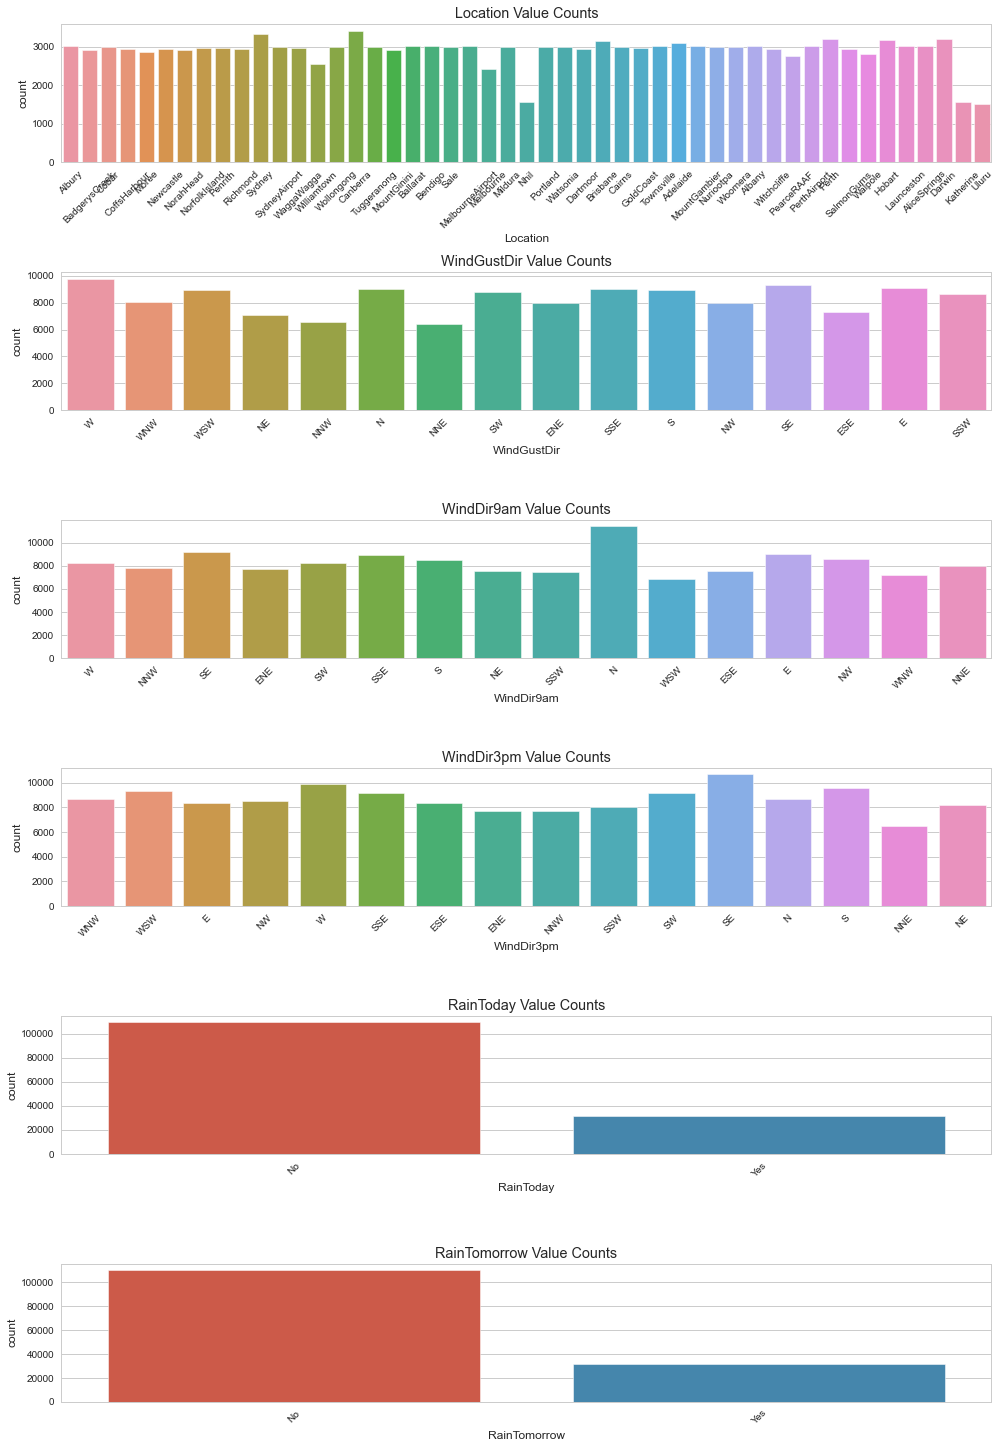

In [13]:
# graph distribution of categorical variables
plt.figure(figsize=(14, 30))
i = 0
for col in cat_cols:
    i += 1
    plt.subplot(910+i)
    plt.title(f'{col} Value Counts')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    sns.countplot(x=col, data=df, orient='v')
    plt.tight_layout();

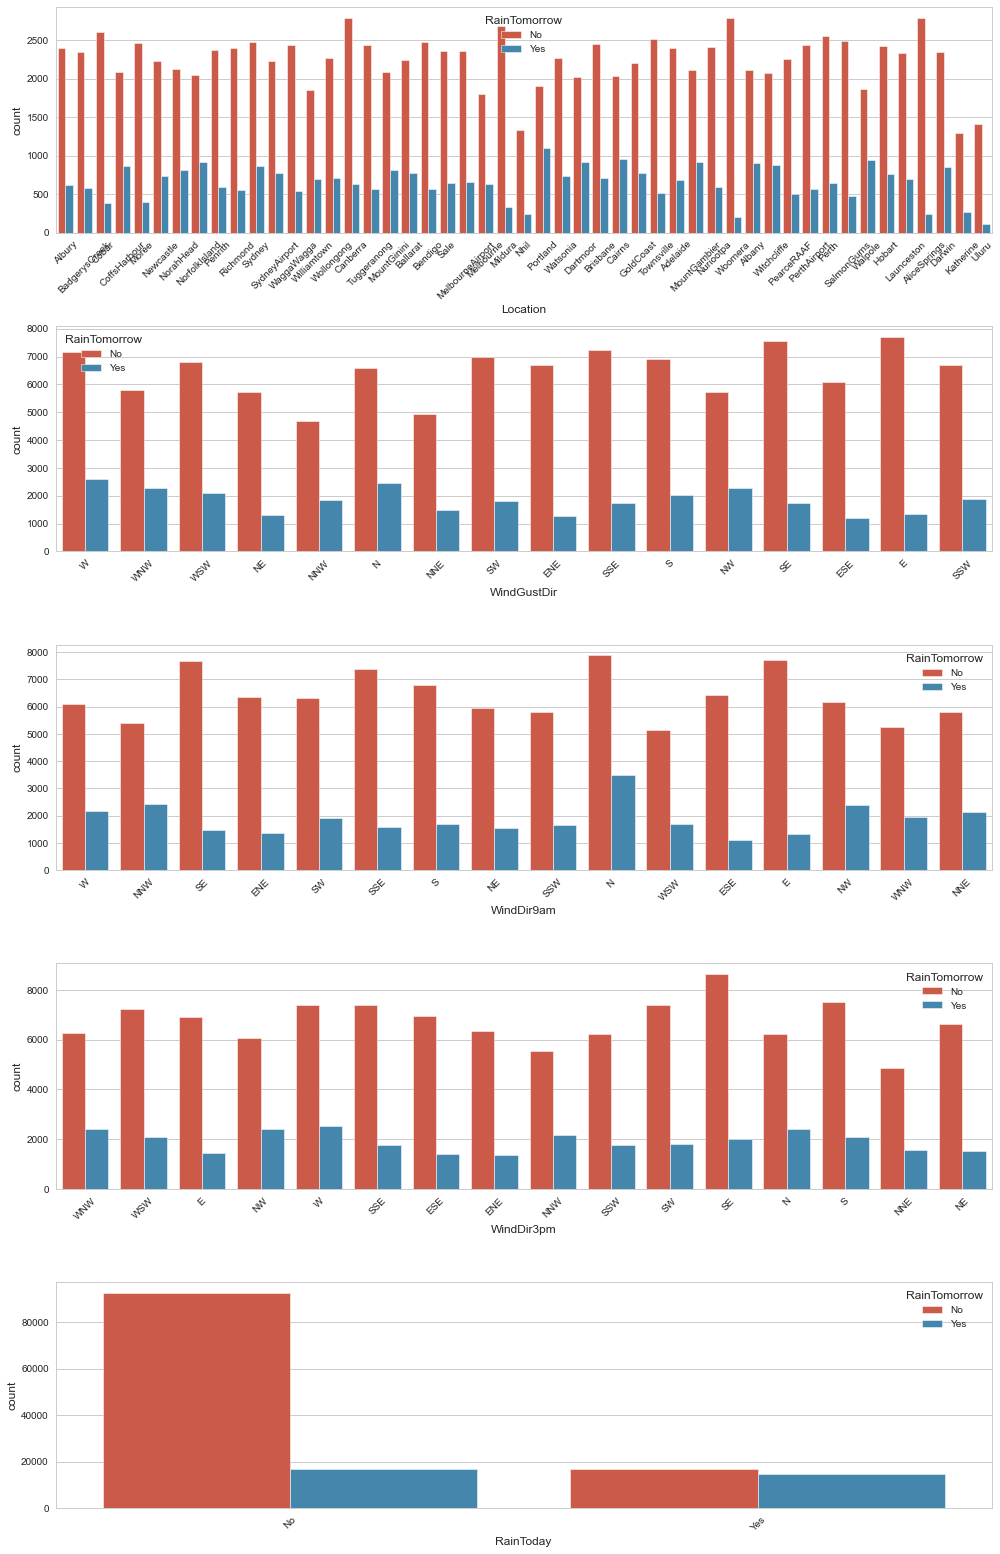

In [14]:
# take a look at categorical feature counts
plt.figure(figsize=(14, 30))

for i in range(len(cat_cols.drop('RainTomorrow'))):
    plt.subplot(7, 1, i+1)
    ax = sns.countplot(x=cat_cols[i], hue='RainTomorrow', data=df)
    plt.xticks(rotation=45)
    plt.tight_layout()

**Inference:**
There is obvious imbalance between positive(Rain next day) and negative(No rain next day) outcomes.

Let's take a look at mean values of features grouped by location.

In [15]:
# show feature mean values grouped by location
df.dropna().groupby('Location').mean()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Location,,,,,,,,,,,,,,,,
AliceSprings,13.878093,29.724921,0.955556,9.017994,9.539316,41.418803,16.008547,18.458839,38.484930,24.024741,1016.260189,1012.446154,2.780927,3.206028,22.043140,28.457175
Brisbane,16.365628,26.436810,2.855401,5.444836,8.171182,28.288520,7.118862,11.131730,63.627159,53.421944,1018.343109,1015.220386,3.845242,3.827294,21.815137,24.746834
Cairns,21.129296,29.551596,4.522259,6.030401,7.664362,38.084288,16.097381,22.086334,69.167758,60.927987,1014.165548,1011.116899,4.420622,4.289280,25.790139,27.872013
Canberra,7.727829,20.363822,1.906957,4.329314,7.399536,40.466605,11.117811,18.455473,72.875696,47.141929,1018.362338,1015.762152,4.353432,4.333952,12.839239,18.917254
Cobar,13.828090,26.225281,1.182397,6.648315,8.728839,36.262172,13.404494,13.649813,55.307116,34.838951,1017.679213,1015.063670,3.061798,3.702247,18.523783,24.873034
CoffsHarbour,14.485000,23.766304,3.885942,3.882464,7.443261,39.116667,15.589855,21.240580,67.551449,61.784058,1018.001087,1015.653768,3.983333,4.226812,20.072174,22.193478
Darwin,23.166492,32.559536,4.038210,6.318746,8.596571,40.429784,15.134226,20.847485,68.111039,51.338668,1011.984095,1008.425114,4.277923,4.264206,27.170967,31.110320
Hobart,8.957091,17.783961,1.624033,3.632749,6.681227,47.743167,16.560083,19.812274,65.402269,52.495101,1014.606034,1013.032852,4.805054,4.946364,12.362249,16.096287
Melbourne,11.672445,20.590253,1.912118,4.534668,6.357271,45.295047,18.896733,21.692835,67.349842,51.336670,1017.615911,1015.776607,5.290306,5.294521,14.501370,19.087777


In [16]:
# take a look at locations sorted by higher chance of rain the next day
pd.crosstab(df['Location'], df['RainTomorrow'], normalize='index').sort_values('Yes', ascending=False)

RainTomorrow,No,Yes
Location,,
Portland,0.634513,0.365487
Walpole,0.663356,0.336644
Cairns,0.682062,0.317938
Dartmoor,0.686714,0.313286
NorfolkIsland,0.689946,0.310054
MountGambier,0.696370,0.303630
Albany,0.700928,0.299072
Witchcliffe,0.702236,0.297764
CoffsHarbour,0.705723,0.294277


Some locations are **drier** than others, they have low chances of rain the next day, such as: Woomera, Uluru, Alice Springs, Mildura and Cobar. Some are **rainier**: Portland, Walpole, Cairns, Dartmoore and Norfolksland.

#### 6.3 Continuous Variables

In [17]:
df[con_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


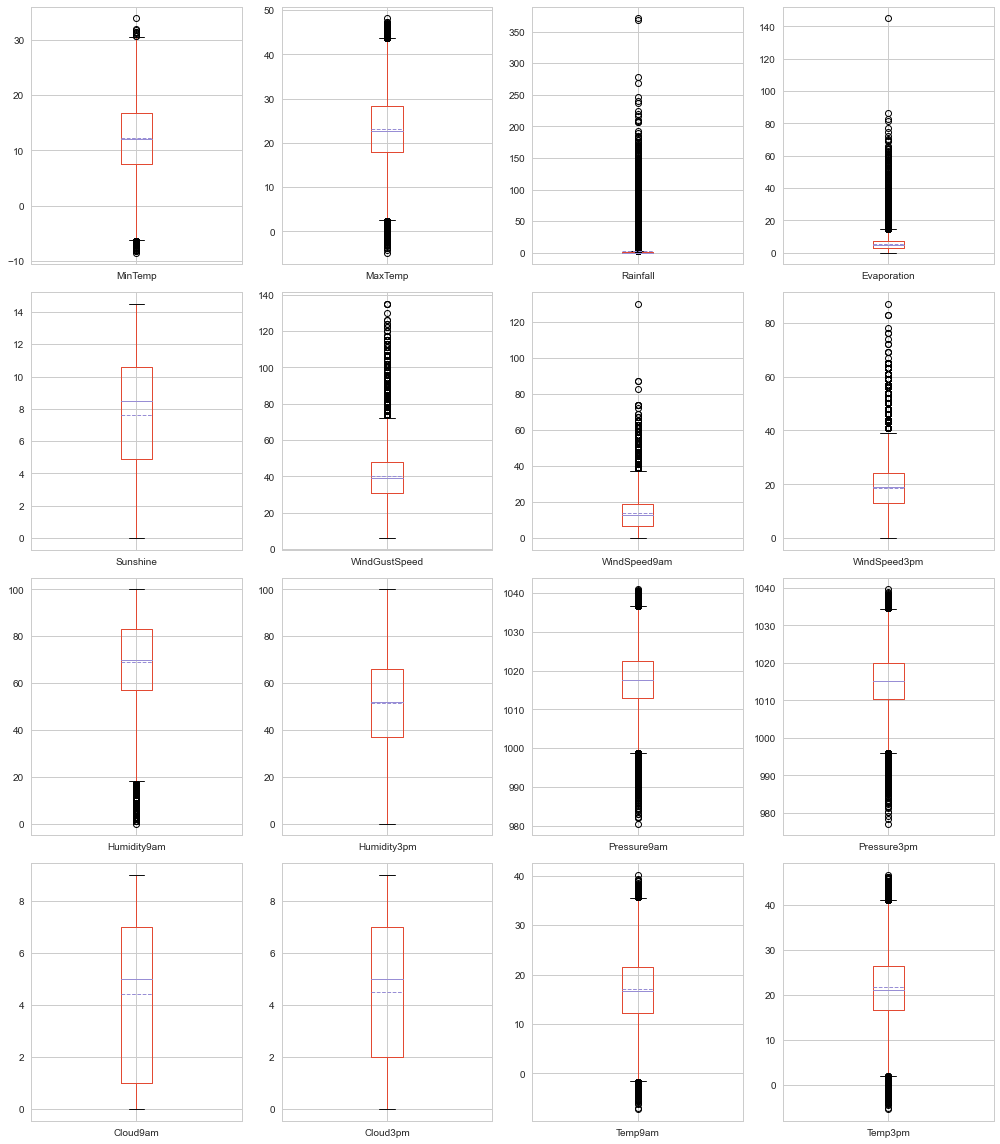

In [18]:
# take a look at continuous variable distributions
plt.figure(figsize=(14, 16))

for i in range(len(con_cols)):
    plt.subplot(4, 4, i+1)
    ax = df[con_cols[i]].plot.box(showmeans=True, meanline=True)
    plt.tight_layout()

**Inference:**
 - Rainfall and Evaporation variables have **many outliers**. These variables are **positively skewed**, their mean values are at a lower end of the distribution.
 - Similarly, WindGustSpeed, WindSpeed9am, WindSpeed3pm have **positive skewness**.
 - Cloup9am and Cloud3pm variables look to have categorical nature, these variables have discreet number of values.

<Figure size 1008x432 with 0 Axes>

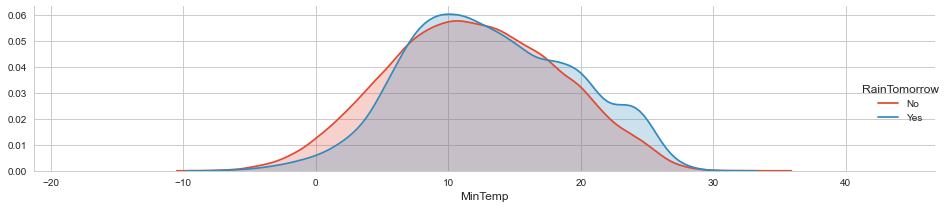

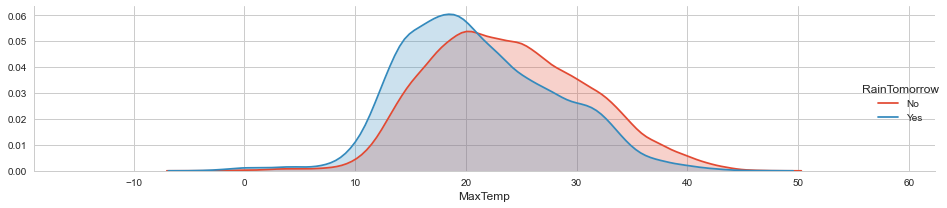

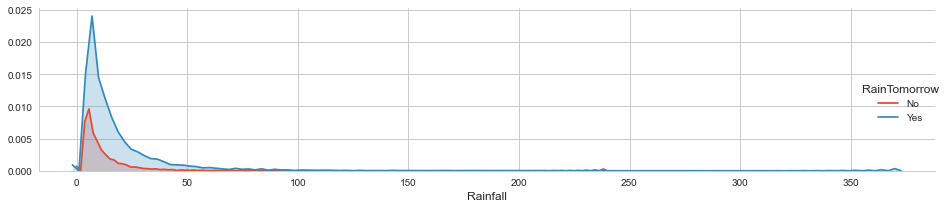

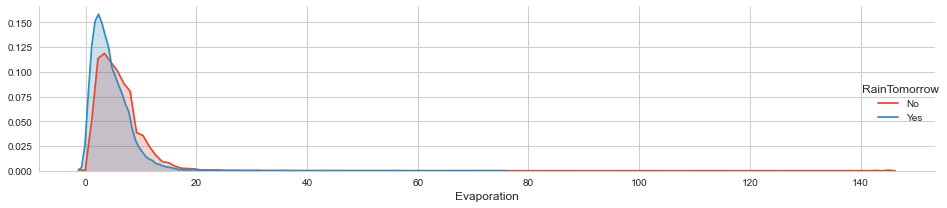

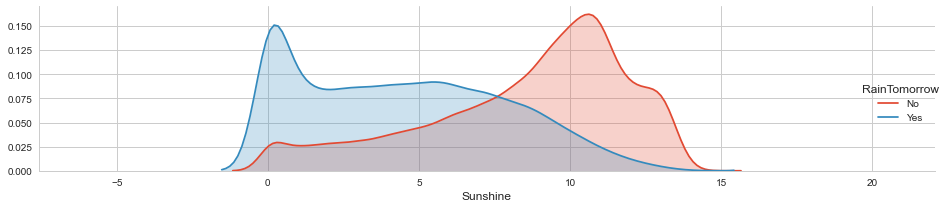

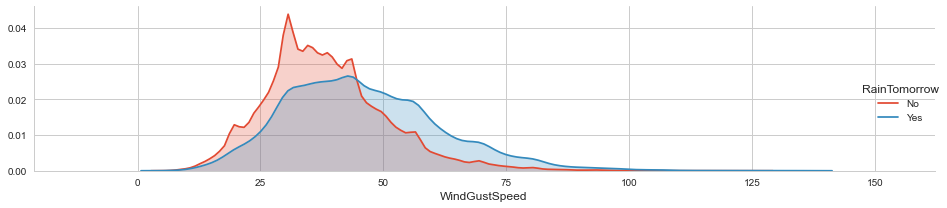

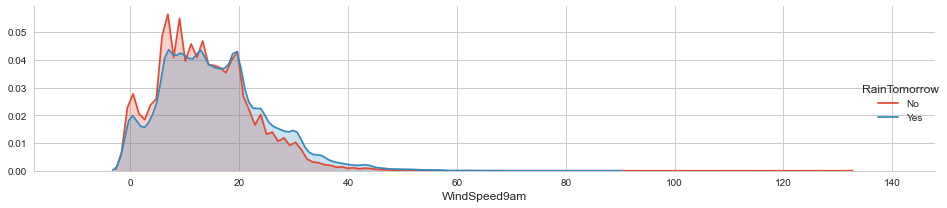

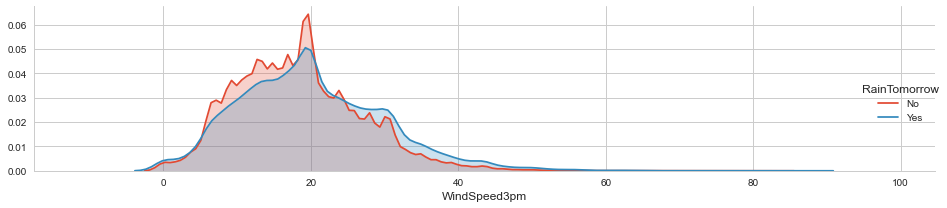

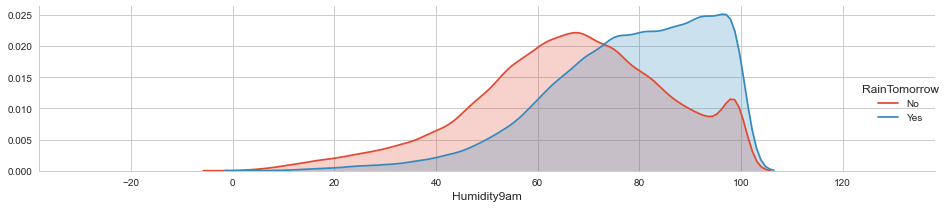

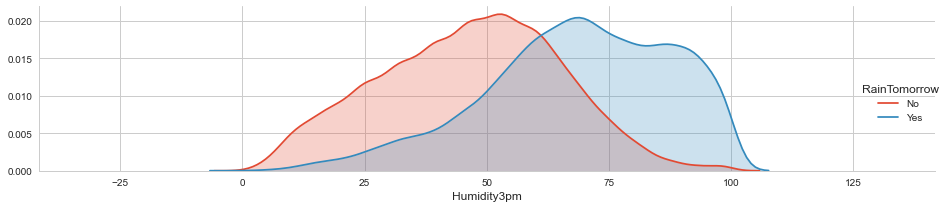

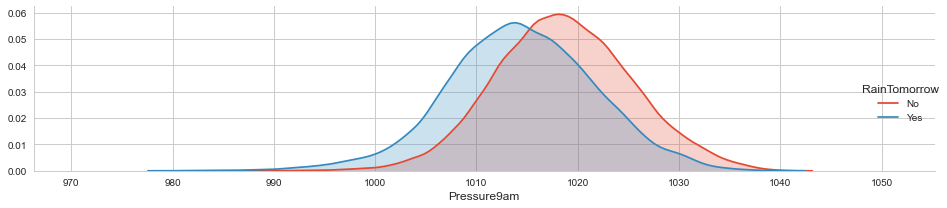

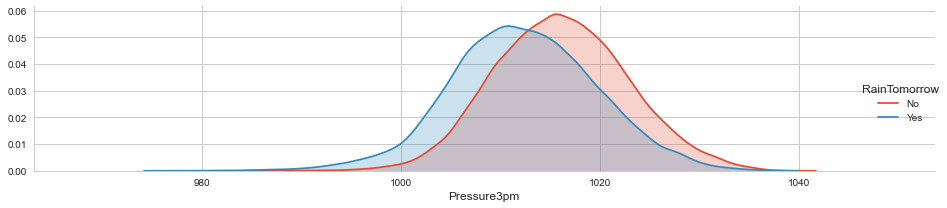

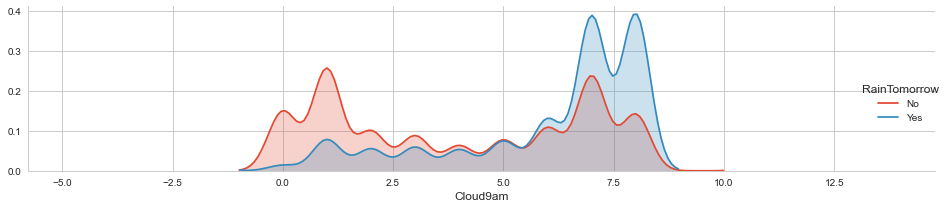

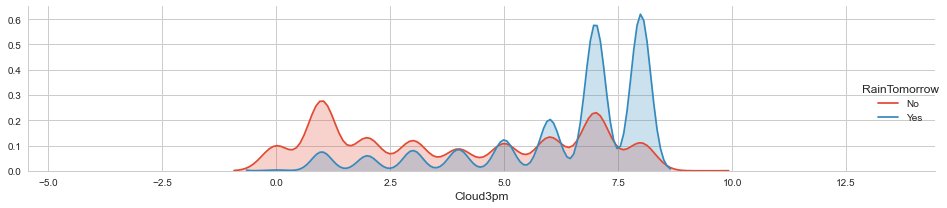

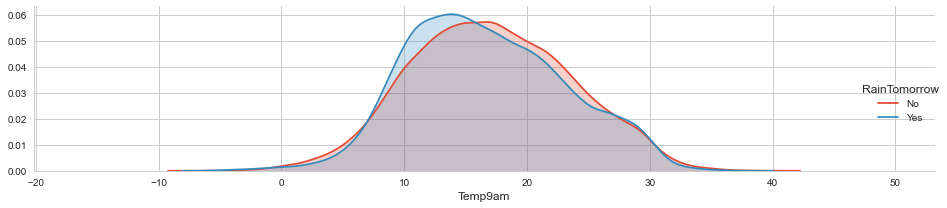

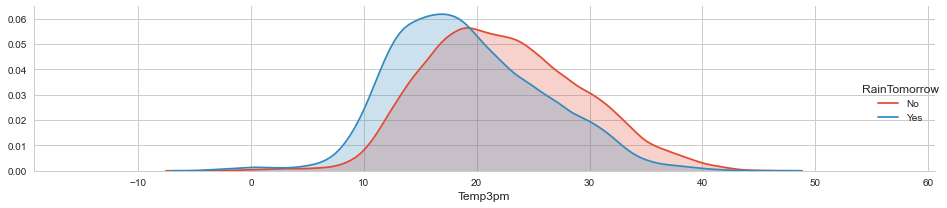

In [19]:
# graph distribution of ordinal(continuous) variables
plt.figure(figsize=(14, 6))
i = 0
for col in con_cols:
    i += 1
    a = sns.FacetGrid(df, hue='RainTomorrow', aspect=4)
    a.map(sns.kdeplot, col, shade=True)
    a.set(xlim=(df[col].min()-2*df[col].std(), df[col].max()+2*df[col].std()))
    a.add_legend()
    plt.tight_layout();

**Inference:**

According to graphs above, on average:
 - **Maximum temperature** tends to be slightly **lower**(1-2 degrees Celsius) when there is rain the next day.
 - Similarly, WindGustSpeed, WindSpeed9am, WindSpeed3pm have **positive skewness**.
 - **Rainfall and Evaporation** tend to be **lower** when there is rain the next day.
 - **Less Sunshine** and **higher WindGustSpeed** are observed when there is rain next day.
 - **Lower Pressure**, **higher Humidity** and **more cloudiness** are observed when there is rain next day.
 - Cloup9am and Cloud3pm variables look to have categorical nature, these variables have discreet number of values. It might be a good idea to explore these as such. 

In [20]:
# make a copy of our dataset
dfv = df.copy()

# encode Yes and No as 1 ad 0 respectively
# this enables us to use RainToday and RainTomorrow variables in numerical visualizations
dfv['RainToday'] = dfv['RainToday'].map({'Yes': 1, 'No': 0})
dfv['RainTomorrow'] = dfv['RainTomorrow'].map({'Yes':1, 'No':0})

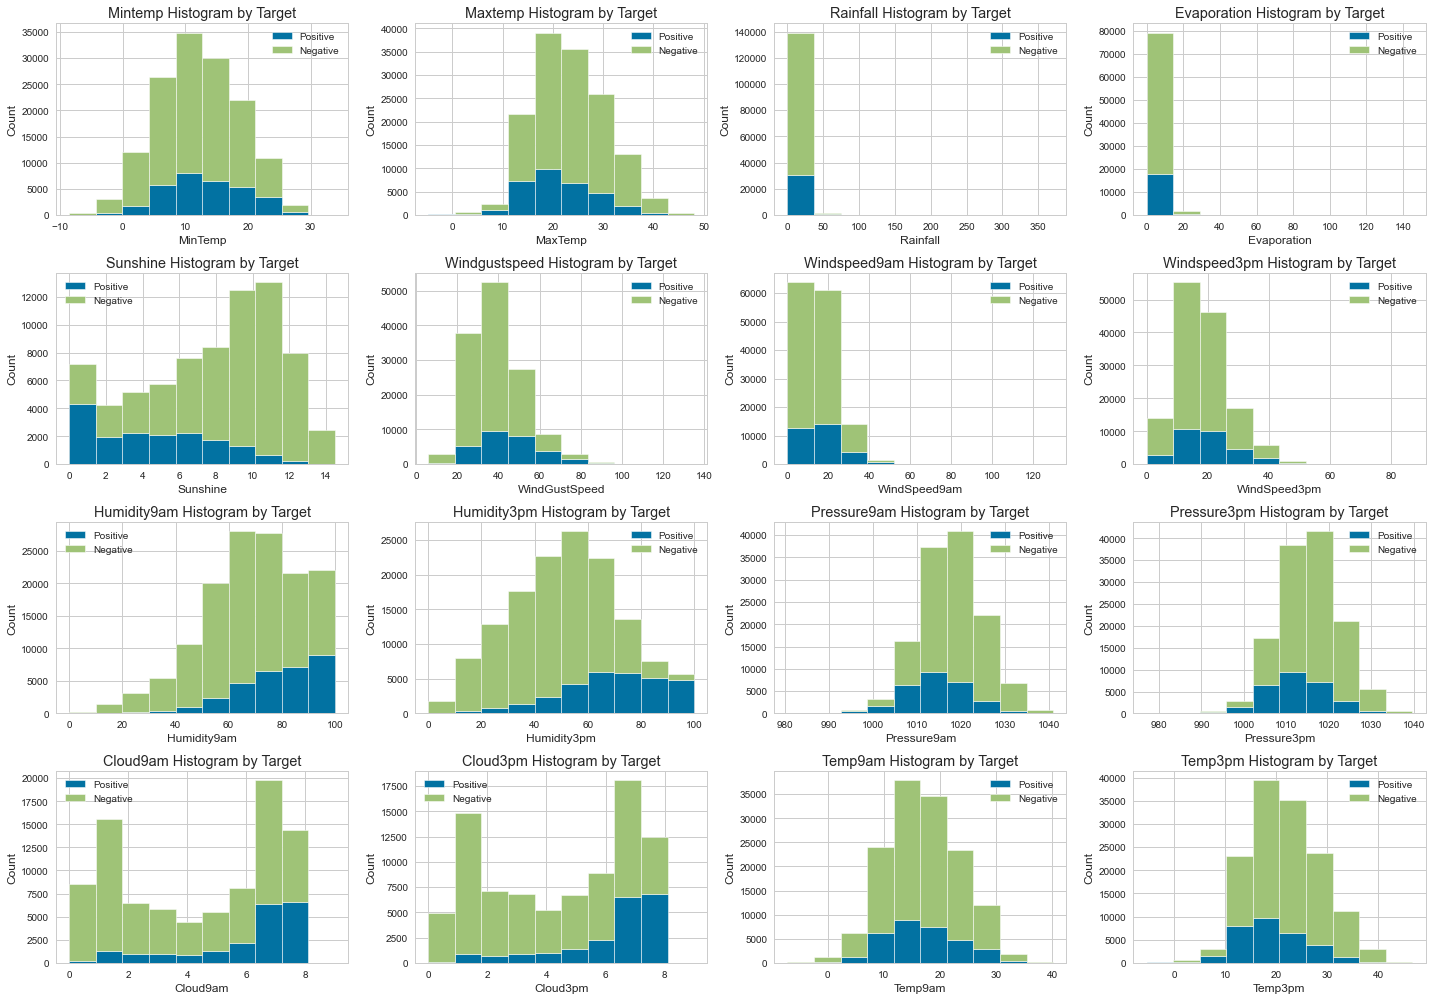

In [21]:
# histograms of continuous variables
plt.figure(figsize=(20, 14))

for i in range(len(con_cols)):
    plt.subplot(4, 4, i+1)
    plt.hist(x=[dfv.loc[dfv['RainTomorrow']==1][con_cols[i]], dfv.loc[dfv['RainTomorrow']==0][con_cols[i]]],
             stacked=True, 
             color=['b', 'g'],
             label=['Positive', 'Negative']
             )
    plt.title(f'{con_cols[i].capitalize()} Histogram by Target')
    plt.xlabel(con_cols[i])
    plt.ylabel('Count')
    plt.legend()
    plt.tight_layout()

#### Pearson's Correlation Coefficient

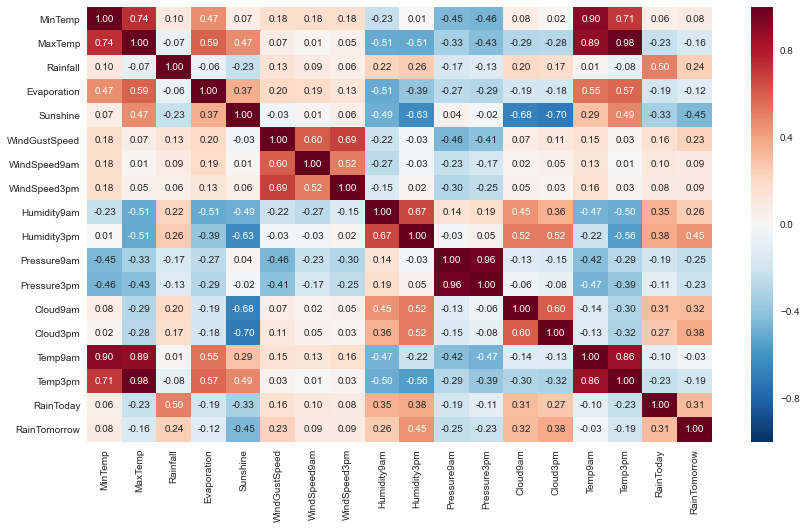

In [22]:
# correlation among ordinal(continuous) variables
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(dfv.corr(), fmt='.2f', annot=True, ax=ax, cmap='RdBu_r', vmin=-1, vmax=1);

**Correlation doesn't mean Causation.**

**Inference:**
- Temperature variables are highly correlated. It might be useful to drop most correlated ones.
- Evaporation variable is positively correlated with temperature and negatively correlated with humidity variables.
- Sunshine variable is positively correlated with MaxTemp and negatively correlated with humidity and cloudiness variables.
- Wind variables are moderately correlated. Also, they are negatively correlated with pressure variables.
- Our target variable, RainTomorrow is negatively correlated with Sunshine and positively correlated with humidity and cloudiness variables.

In [23]:
# take a look at total Rainfall, Evaporation, Sunshine grouped by year
df.loc[:, ['Rainfall', 'Evaporation', 'Sunshine']].groupby(df.index.year).sum()

,Rainfall,Evaporation,Sunshine
Date,,,
2007,196.4,357.4,493.3
2008,5141.2,9931.0,15046.5
2009,35652.5,61088.8,83196.8
2010,43828.6,52079.6,76596.2
2011,42163.4,46853.3,67636.0
2012,35825.5,46485.3,66528.5
2013,36108.3,53993.6,66747.2
2014,33603.3,56351.3,66899.2
2015,36492.7,52038.4,62479.9


Looks like 2010, 2011 and 2016 were some of the rainiest years, but the reason for this may be missing values for other years.

In [24]:
# take a look at total Rainfall, Evaporation, Sunshine grouped by Location sorted by most Rainfall
df.loc[:, ['Rainfall', 'Evaporation', 'Sunshine']].groupby(df['Location']).sum().sort_values('Rainfall', ascending=False)

,Rainfall,Evaporation,Sunshine
Location,,,
Cairns,17088.4,16443.1,19409.7
Darwin,16260.2,19829.3,27104.3
CoffsHarbour,14860.5,6953.5,10977.3
Sydney,11093.0,17045.9,23842.7
GoldCoast,10903.4,0.0,0.0
Wollongong,10562.8,0.0,0.0
Townsville,10560.0,21188.3,22133.0
Brisbane,9898.8,16994.6,25161.7
NorahHead,9768.6,0.0,0.0


In [28]:
# make a pivot table of total Rainfall by location and year
pd.pivot_table(df, values='Rainfall', index=df['Location'], columns=df.index.year, aggfunc='sum')

Date,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Location,,,,,,,,,,,
Adelaide,NaN,229.0,515.2,592.4,494.6,498.8,462.4,533.2,395.2,820.8,206.4
Albany,NaN,29.2,919.2,742.2,896.0,842.3,952.2,648.6,608.9,886.3,231.3
Albury,NaN,54.0,476.0,916.4,845.0,735.4,527.6,593.6,621.6,805.0,185.2
AliceSprings,NaN,54.8,76.8,769.6,366.2,185.4,172.4,251.4,349.2,356.2,47.8
BadgerysCreek,NaN,NaN,568.4,797.0,707.0,858.8,749.6,690.0,816.8,664.6,500.0
Ballarat,NaN,83.4,553.0,878.8,599.0,599.4,455.0,453.4,453.0,740.6,279.6
Bendigo,NaN,56.6,418.0,1060.4,718.0,440.0,462.2,462.8,357.0,676.8,261.2
Brisbane,NaN,606.8,1069.2,1650.0,1072.0,1126.4,850.4,789.8,1443.0,736.2,555.0
Cairns,NaN,195.2,2199.4,2659.8,2574.4,1989.0,1151.8,1814.6,1896.6,1351.4,1256.2


### 7. Sample Data

In [30]:
# define target vector (y)
y = df['RainTomorrow']

# define features matrix (X)
X = df.drop(['RainTomorrow'], axis=1)

# look at the sizes of features matrix and target vector
print(f'X: {X.shape}, y: {y.shape}')

X: (142193, 21), y: (142193,)


In [31]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

print(f'X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}')

X_train: (99535, 21)
y_train: (99535,)
X_test: (42658, 21)
y_test: (42658,)


In [36]:
dfi = dfv.copy()

for col in con_cols:
    dfi[col] = dfi[col].fillna(dfi[col].median())

for col in cat_cols:
    dfi[col] = dfi[col].fillna(dfi[col].mode()[0])

In [37]:
dfi.isnull().sum().sum()

0

In [38]:
# define target vector (y)
yi = dfi['RainTomorrow']

# define features matrix (X)
Xi = dfi.drop(['RainTomorrow'], axis=1)

In [39]:
# split X and y into training and testing sets
Xi_train, Xi_test, y_train, y_test = train_test_split(Xi, yi, test_size=0.3, random_state=43)

print(f'X_train: {Xi_train.shape}\ny_train: {y_train.shape}\nX_test: {Xi_test.shape}\ny_test: {y_test.shape}')

X_train: (99535, 21)
y_train: (99535,)
X_test: (42658, 21)
y_test: (42658,)


### 8. Preprocess Data

#### Missing values

In [40]:
# Are there any missing values?
print('There is(are) {} total missing value(s) in dataset'.format(df.isnull().sum().sum()))

# Are there any duplicated samples?
print('There is(are) {} duplicated row(s) in dataset'.format(df.duplicated().sum()))

There is(are) 316559 total missing value(s) in dataset
There is(are) 45 duplicated row(s) in dataset


In [41]:
# make a dataframe of features with their missing percentages and data types
pd.DataFrame({'% Missing':(df.isnull().mean()*100).values, 
              'Data Type':(df.dtypes)}
            ).sort_values('% Missing', ascending=False)

,% Missing,Data Type
Sunshine,47.692924,float64
Evaporation,42.789026,float64
Cloud3pm,40.152469,float64
Cloud9am,37.735332,float64
Pressure9am,9.855619,float64
Pressure3pm,9.832411,float64
WindDir9am,7.041838,object
WindGustDir,6.561504,object
WindGustSpeed,6.519308,float64
WindDir3pm,2.656952,object


#### Preprocessor

In [42]:
# define a numerical transformer for preprocessor
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                      ('scaler', RobustScaler())])

# define a categorical transformer for preprocessor
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# define preprocessor
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, con_cols),
                                               ('cat', categorical_transformer, cat_cols.drop('RainTomorrow'))])

## 9. Model Building

https://en.wikipedia.org/wiki/Matthews_correlation_coefficient

We will define Matthews correlation coefficient which is a better evaluation metrics for classification models used on imbalanced target variables.

### 9.1 Baseline Model

In [43]:
# define matthews score to use in cross validation scoring
matthews = make_scorer(matthews_corrcoef)

In [44]:
# define a Dummy Classifier to see most frequent class
dc = DummyClassifier(strategy='most_frequent')
dc.fit(X, y)
dc.score(X, y)

0.7758187815152645

Looks like there exists 77.58% chance that it will not rain next day, for our given dataset. Therefore, if we predict negative for every row our model will be **77.58% accurate**. I will try to outperform this accuracy threshold and try other classification metrics that are more reliable with a classification problem with imbalanced classes.

In [45]:
# same result we can achieve by counting negative values for our target variable
df['RainTomorrow'].value_counts(normalize=True)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

### 9.2 Various Classifiers

Wwe will define feature matrix and target vector from visualization dataset because it has target variable converted into 1-0. We will take a look at different classifiers below:

In [34]:
# define target vector (yv)
yv = dfv['RainTomorrow']

# define features matrix (Xv)
Xv = dfv.drop('RainTomorrow', axis=1)

In [47]:
# transform existing Xv using predefined preprocessor
# preprocessor returns a sparse matrix
Xv = preprocessor.fit_transform(Xv)

# convert the sparse matrix onto a numpy array
Xv = Xv.toarray()

# convert the numpy array into a pandas dataframe
Xv = pd.DataFrame(Xv)

In [49]:
# split Xv and yv into training and testing sets
Xv_train, Xv_test, yv_train, yv_test = train_test_split(Xv, yv, test_size=0.3, random_state=43)
print(f'Xv_train: {Xv_train.shape}\nyv_train: {yv_train.shape}\nXv_test: {Xv_test.shape}\nyv_test: {yv_test.shape}')

Xv_train: (99535, 115)
yv_train: (99535,)
Xv_test: (42658, 115)
yv_test: (42658,)


In [55]:
for model in (LogisticRegression,
              RandomForestClassifier,
              XGBClassifier
             ):
    classifier = model()
    classifier.fit(Xv_train, yv_train)
    score = classifier.score(Xv_test, yv_test)
    print(f'{model.__name__:25} AUC: {score.mean():.3f}')

LogisticRegression        AUC: 0.849
RandomForestClassifier    AUC: 0.856
XGBClassifier             AUC: 0.862


Top 3 scorers are:
1. Logistic Regression
2. Gaussian NB
3. Decision Tree

We will take a look at them in same order.

### 9.3 Logistic Regression

In [33]:
logr = LogisticRegression(random_state=43)
logr.fit(X_train, y_train)

NameError: name 'Xv_train' is not defined

In [123]:
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('logistic', logr)])

In [124]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
          

In [125]:
pipe.score(X_test, y_test)

0.8484223357869567

In [117]:
logr = LogisticRegression(random_state=43)
logr.fit(Xv_train, yv_train)

LogisticRegression(random_state=43)

In [118]:
X_train.isnull().sum().sum()

221118

In [119]:
logr.score(Xv_test, yv_test)

0.8487505274508884

In [121]:
score_this(logr, Xv, yv)


Accuracy: 0.830871
Matthews: 0.481941
F1: 0.576885


In [127]:
score_this(pipe, Xv, yv)


Accuracy: 0.830315
Matthews: 0.480501
F1: 0.575963


In [ ]:
# Feature importance
print('Feature Importances:')
for col, val in sorted(zip(X.columns, logr.coef_[0]),
                       key=lambda x: x[1],
                       reverse=True
                      ):
    print(f'{col:10}{val:10.3f}')

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
logr_fi = FeatureImportances(logr)
logr_fi.fit(X, y)
logr_fi.poof();

#### Learning Curve

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
cv = model_selection.StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
logr_lc = LearningCurve(logr, cv=cv, train_sizes=sizes, scoring='f1_weighted', n_jobs=-1, ax=ax)
logr_lc.fit(X, y)
logr_lc.poof();

Inference:

Learning curve shows us that our Logistic Regression Classifier is **performing quite well**. Difference between Training and Cross Validation Scores is minimizing with more data.

#### Cumulative Gains Plot

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
y_probas = logr.predict_proba(X_test)
scikitplot.metrics.plot_cumulative_gain(y_test, y_probas, ax=ax);

**Inference:**


### XGBoost Classifier

#### Learning Curve

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
cv = model_selection.StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
svc_lc = LearningCurve(svc, cv=cv, train_sizes=sizes, scoring='f1_weighted', n_jobs=-1, ax=ax)
svc_lc.fit(X, y)
svc_lc.poof();

**Inference:**

Learning curve shows us that our Support Vector Classifier is suffering from high variance(overfitting). Depending on the costs, **gathering more data** will likely improve the Cross Validation Score and prevent overfitting.

#### Cumulative Gains Plot

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
y_probas = svc.predict_proba(X_test)
scikitplot.metrics.plot_cumulative_gain(y_test, y_probas, ax=ax);

**Inference:**

This plot shows that if we ordered our patients by how likely they are to have heart disease, **if we took first 65% of them we would have 98% of sick patients.**

### Random Forest Classifier

In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=43)
rf.fit(X_train, y_train)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
print('Precision score:', metrics.precision_score(y_test, rf.predict(X_test)))
print('ROC_AUC score:', metrics.roc_auc_score(y_test, rf.predict(X_test)))
print('F1 score:', metrics.f1_score(y_test, rf.predict(X_test)))
print('Matthews score:', metrics.matthews_corrcoef(y_test, rf.predict(X_test)))

In [ ]:
# Feature Importances
print('Feature Importances:')
for col, val in sorted(zip(X_train.columns, rf.feature_importances_),
                       key = lambda x: x[1],
                       reverse=True
                      ):
    print(f'{col:10} {val:10.3f}')

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
rf_fi = FeatureImportances(rf)
rf_fi.fit(X, y)
rf_fi.poof();

### Optimize Model

Below we will tune hyperparameters of our Random Forest classifier and attempt to increase model's accuracy.

In [ ]:
# rf_test = ensemble.RandomForestClassifier(random_state=43)
# params = {'max_features': [0.4, 'auto'],
#           'n_estimators': [15, 200],
#           'min_samples_leaf': [1, 0.1],
#           'random_state': [43]
#          }
# cv = model_selection.GridSearchCV(rf, params, n_jobs=-1).fit(X_train, y_train)
# print(cv.best_params_)

In [ ]:
# rf_best = ensemble.RandomForestClassifier(**{'max_features': 'auto',
#                                              'n_estimators': 200,
#                                              'min_samples_leaf': 0.1,
#                                              'random_state': 43
#                                             })
# rf_best.fit(X_train, y_train)

In [ ]:
# print('Precision score:', metrics.precision_score(y_test, rf_best.predict(X_test)))
# print('ROC_AUC score:', metrics.roc_auc_score(y_test, rf_best.predict(X_test)))
# print('F1 score:', metrics.f1_score(y_test, rf_best.predict(X_test)))
# print('Matthews score:', metrics.matthews_corrcoef(y_test, rf_best.predict(X_test)))

Slight improvement of accuracy has been reached after hyperparameter tuning.

#### Learning Curve

In [ ]:
# fig, ax = plt.subplots(figsize=(6, 6))
# cv = model_selection.StratifiedKFold(12)
# sizes = np.linspace(0.3, 1.0, 10)
# lc_viz = LearningCurve(rf_best, cv=cv, train_sizes=sizes, scoring='f1_weighted', n_jobs=-1, ax=ax)
# lc_viz.fit(X, y)
# lc_viz.poof();

**Inference:**

Learning curve shows us that our Random Forest Classifier might be suffering from high bias(underfitting) since both Training and Cross Validation Scores are lower than Logistic Classifier's scores. Depending on the importance of ~5% accuracy, **more complex(polynomial features) models or using more features** might fix our underfitting problem.

### Shapley

In [ ]:
# shap.initjs()

# s = shap.TreeExplainer(rf_best)
# shap_vals = s.shap_values(X_test)
# shap.force_plot(s.expected_value[0],
#                 shap_vals[0][3, :],
#                 feature_names=X.columns
#                )


In [ ]:
# shap.dependence_plot('age',
#                      shap_vals[0],
#                      X_test,
#                      feature_names=X_test.columns,
#                      alpha=0.5
#                     )

In [ ]:
# shap.dependence_plot('oldpeak',
#                      shap_vals[0],
#                      X_test,
#                      feature_names=X_test.columns,
#                      alpha=0.5
#                     )

In [ ]:
# shap.dependence_plot('chol',
#                      shap_vals[0],
#                      X_test,
#                      feature_names=X_test.columns,
#                      alpha=0.5
#                     )

In [ ]:
# shap.dependence_plot('trestbps',
#                      shap_vals[0],
#                      X_test,
#                      feature_names=X_test.columns,
#                      alpha=0.5
#                     )

In [ ]:
# shap.summary_plot(shap_vals[0], X_test)

### Dimensionality Reduction

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
svd = TruncatedSVD()
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd.fit(Xi)

In [ ]:
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())